<a href="https://colab.research.google.com/github/felipe39/Projeto-analise-dados/blob/main/02_teoria_dos_conjuntos_analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 02 — Teoria dos Conjuntos aplicada à Análise de Dados 📊🐼

## Disciplina
Matemática e Lógica

## Objetivo
Aplicar os conceitos da Teoria dos Conjuntos (união, interseção, diferença e cardinalidade)
em um contexto prático de análise de dados, utilizando Python e Pandas.

## Contexto Profissional
No mercado, analistas de dados trabalham com tabelas (DataFrames), não com listas isoladas.
Operações de Teoria dos Conjuntos são implementadas por meio de **joins entre tabelas**.

## Relação com a Teoria dos Conjuntos

| Teoria Matemática | Implementação no Pandas |
|------------------|------------------------|
| União (A ∪ B) | merge(..., how='outer') |
| Interseção (A ∩ B) | merge(..., how='inner') |
| Diferença (A − B) | left join + filtro |
| Cardinalidade | len(DataFrame) |

**Aplicações:** Marketing Analytics, CRM, Antifraude, Inteligência de Negócios

In [ ]:
import pandas as pd

# Tabelas simuladas de clientes por produto
df_produto_A = pd.DataFrame({
    'Clientes': ['Ana', 'Bruno', 'Carlos', 'Daniel']
})

df_produto_B = pd.DataFrame({
    'Clientes': ['Carlos', 'Eduardo', 'Fernanda', 'Bruno']
})

print("Clientes do Produto A")
display(df_produto_A)
print("Clientes do Produto B")
display(df_produto_B)

Clientes do Produto A


,Clientes
0,Ana
1,Bruno
2,Carlos
3,Daniel


Clientes do Produto B


,Clientes
0,Carlos
1,Eduardo
2,Fernanda
3,Bruno


In [ ]:
# União: clientes que compraram pelo menos um produto
todos_clientes = pd.merge(
    df_produto_A,
    df_produto_B,
    on='Clientes',
    how='outer'
)

print(f"Total de clientes únicos: {len(todos_clientes)}")
display(todos_clientes)
print("📐 Conceito aplicado: União (A ∪ B)")

Total de clientes únicos: 6


,Clientes
0,Ana
1,Bruno
2,Carlos
3,Daniel
4,Eduardo
5,Fernanda


📐 Conceito aplicado: União (A ∪ B)


In [ ]:
# Interseção: clientes que compraram ambos os produtos
clientes_ambos = pd.merge(
    df_produto_A,
    df_produto_B,
    on='Clientes',
    how='inner'
)

print(f"Clientes que compraram A e B: {len(clientes_ambos)}")
display(clientes_ambos)
print("📐 Conceito aplicado: Interseção (A ∩ B)")

Clientes que compraram A e B: 2


,Clientes
0,Bruno
1,Carlos


📐 Conceito aplicado: Interseção (A ∩ B)


In [ ]:
# Diferença A − B: apenas Produto A
merge_A = pd.merge(
    df_produto_A,
    df_produto_B,
    on='Clientes',
    how='left',
    indicator=True
)

somente_A = merge_A[merge_A['_merge'] == 'left_only'].drop(columns=['_merge'])

print("Clientes que compraram APENAS o Produto A:")
display(somente_A)
print("📐 Conceito aplicado: Diferença (A − B)")

Clientes que compraram APENAS o Produto A:


,Clientes
0,Ana
3,Daniel


📐 Conceito aplicado: Diferença (A − B)


In [ ]:
# Diferença B − A: apenas Produto B
merge_B = pd.merge(
    df_produto_B,
    df_produto_A,
    on='Clientes',
    how='left',
    indicator=True
)

somente_B = merge_B[merge_B['_merge'] == 'left_only'].drop(columns=['_merge'])

print("Clientes que compraram APENAS o Produto B:")
display(somente_B)
print("📐 Conceito aplicado: Diferença (B − A)")

Clientes que compraram APENAS o Produto B:


,Clientes
1,Eduardo
2,Fernanda


📐 Conceito aplicado: Diferença (B − A)


In [ ]:
# Cardinalidade e métricas analíticas
total = len(todos_clientes)
ambos = len(clientes_ambos)
apenas_A = len(somente_A)
apenas_B = len(somente_B)

print(f"Total de clientes: {total}")
print(f"Clientes fiéis (A ∩ B): {ambos} ({ambos/total:.1%})")
print(f"Exclusivos Produto A: {apenas_A} ({apenas_A/total:.1%})")
print(f"Exclusivos Produto B: {apenas_B} ({apenas_B/total:.1%})")

# Tabela executiva
dados_resumo = {
    'Métrica': ['Total', 'Fiéis (A∩B)', 'Só A', 'Só B'],
    'Quantidade': [total, ambos, apenas_A, apenas_B],
    '% Total': [f'{total/total:.1%}', f'{ambos/total:.1%}', f'{apenas_A/total:.1%}', f'{apenas_B/total:.1%}']
}
df_resumo = pd.DataFrame(dados_resumo)
display(df_resumo)

Total de clientes: 6
Clientes fiéis (A ∩ B): 2 (33.3%)
Exclusivos Produto A: 2 (33.3%)
Exclusivos Produto B: 2 (33.3%)


,Métrica,Quantidade,% Total
0,Total,6,100.0%
1,Fiéis (A∩B),2,33.3%
2,Só A,2,33.3%
3,Só B,2,33.3%


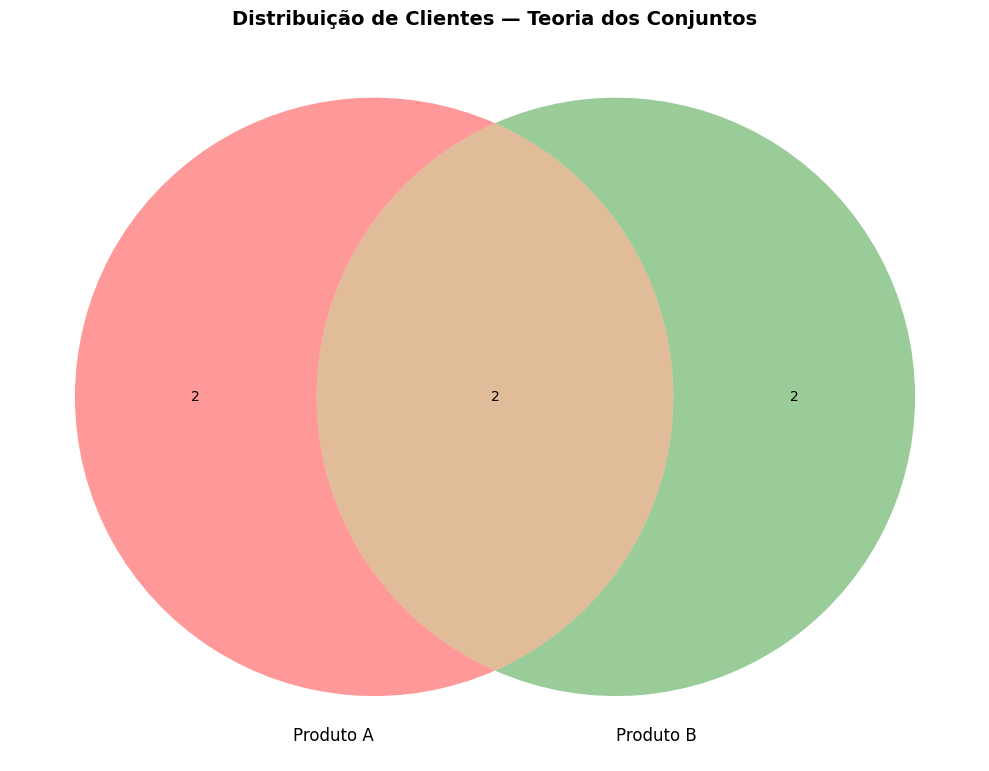

In [ ]:
!pip install matplotlib-venn -q

from matplotlib_venn import venn2
import matplotlib.pyplot as plt

set_A = set(df_produto_A['Clientes'])
set_B = set(df_produto_B['Clientes'])

plt.figure(figsize=(10, 8))
venn2([set_A, set_B], set_labels=('Produto A', 'Produto B'))
plt.title("Distribuição de Clientes — Teoria dos Conjuntos", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Conclusão Analítica

**Este projeto demonstrou que:**

1. **Teoria dos Conjuntos → Análise de Dados reais**
2. **Pandas merge() = operações matemáticas escaláveis**
3. **Cardinalidade → KPIs executivos**
4. **Visualização → Comunicação de resultados**

**Aplicações profissionais:**
- Marketing Analytics (segmentação)
- CRM (clientes fiéis)
- Antifraude (padrões exclusivos)
- Inteligência de Negócios (cruzamento de bases)
